# Analyze Correlation Exists Between Movies Revenue its Budget

**Table of contents:**
* [Data Exploration](#data-exploration)
* [Statistics on Budget and Gross](#statistics)
* [Seaborn Data Visualisation](#visualisation)
* [Convert Year to Decade](#year-to-decade)
* [Plotting Linear Regression with Seaborn](#linear-regression)
* [Create LinearRegression model with Scikit-learn](#linear-regression-model)

## Data Exploration and Data Cleaning <a id='data-exploration'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('data/cost_revenue_dirty.csv')
df.sample(n=10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1997,2898,3/21/2003,Boat Trip,"$15,000,000","$14,933,713","$8,586,376"
3699,2612,8/1/2010,Youth in Revolt,"$18,000,000","$19,685,588","$15,285,588"
932,537,12/13/1996,Mars Attacks!,"$80,000,000","$101,371,017","$37,771,017"
223,2980,6/17/1977,Exorcist II: The Heretic,"$14,000,000","$25,011,000","$25,011,000"
3495,808,10/28/2009,Michael Jackson's This Is It,"$60,000,000","$252,091,016","$72,091,016"
5193,5291,5/24/2016,Une Femme Mariée,"$120,000",$0,$0
318,3256,12/6/1981,History of the World: Part I,"$11,000,000","$31,672,000","$31,672,000"
4732,3733,11/14/2014,Beyond the Lights,"$7,000,000","$14,618,727","$14,618,727"
1817,1458,5/24/2002,Enough,"$38,000,000","$50,970,660","$39,177,215"
3475,3762,9/25/2009,I Hope They Serve Beer in Hell,"$7,000,000","$1,429,453","$1,429,299"


In [3]:
print(f'The shape: {df.shape}')
print(f'The column names: {df.columns}')

The shape: (5391, 6)
The column names: Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')


Are there any NaN values, check the datatype of each column, are there any duplicated entries.

In [4]:
df.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
df.duplicated(subset=['Release_Date', 'Movie_Title']).any()

True

There are duplicated entries in the `Release_Date` and `Movie_Title` subset.

Let's see what they are?

In [7]:
df[df.duplicated(subset=['Release_Date', 'Movie_Title'])]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


So there are two entries for `A Dog's Breakfast`.

Let's remove one.

In [8]:
df = df.drop_duplicates(subset=['Release_Date', 'Movie_Title'])
df.duplicated(subset=['Release_Date', 'Movie_Title']).any()

False

Now that we have removed duplicates and checked there are no NaN values in our DataFrame. What else can we do next?

* Change the dtype of `USD_Production_Budget`, `USD_Worldwide_Gross` and `USD_Domestic_Gross` to numerical data type.
* Change the `Release_Date` into datetime data type.

In [9]:
cols_to_repl = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
chars_to_repl = ['$', ',']

for col in cols_to_repl:
    for char in chars_to_repl:
        df[col] = df[col].str.replace(char, '', regex=False)
    df[col] = pd.to_numeric(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   int64 
 4   USD_Worldwide_Gross    5390 non-null   int64 
 5   USD_Domestic_Gross     5390 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 294.8+ KB


In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


In [11]:
df.sample(n=20)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
622,1315,1991-12-20,JFK,40000000,205400000,70405498
2343,1721,2004-12-15,Million Dollar Baby,30000000,231928227,100492203
3758,2316,2010-10-15,Jackass 3D,20000000,171685793,117229692
776,1398,1995-04-21,Kiss of Death,40000000,14942422,14942422
1739,1603,2001-12-25,The Shipping News,35000000,24405825,11405825
2119,564,2003-11-07,The League of Extraordinary Gentlemen,78000000,179265204,66465204
2721,3600,2006-07-26,Little Miss Sunshine,8000000,100642353,59891098
4326,2803,2013-01-18,Mama,15000000,148095566,71628180
4552,4460,2014-02-05,Ida,2600000,15298355,3827060
2493,1371,2005-09-11,Get Rich or Die Tryin',40000000,46666955,30981850


## Statistics On The Data <a id='statistics'></a>
Now that we have completed cleaning our data, let's look into the statistics of our data to see what it reveals.

In [12]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5390.000000,5.390000e+03,5.390000e+03,5.390000e+03
mean,2695.518738,3.111949e+07,8.887191e+07,4.124317e+07
std,1556.135163,4.052536e+07,1.684690e+08,6.603308e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.250000,5.000000e+06,3.877146e+06,1.335066e+06
50%,2695.500000,1.700000e+07,2.746004e+07,1.719656e+07
75%,4042.750000,4.000000e+07,9.646182e+07,5.234866e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


From the above output, we can conclude that:
* The average production budget for the movies is around `$31,119,490`.
* The average worldwide gross is `$88,871,190`.
* The minimum gross for domestic and worldwide is `$0`.
* The 25th percentile of the movies were making little profit.
* The lowest production budget is `$1,100` and the highest production budget is `$425,000,000`.

How much did the movie with the lowest budget film make?

In [13]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


How much did the movie with the highest budget film make?

In [14]:
df[df['USD_Production_Budget'] == df['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


What are the top 5 movies with highest production budget but make 0 domestic gross?

In [15]:
df_zero_gross_dom = df[df['USD_Domestic_Gross'] == 0]
df_zero_gross_dom.sort_values('USD_Production_Budget').tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


What are the top 5 movies with highest production budget but make zero gross worldwide?

In [16]:
df_zero_gross_worldwide = df[df['USD_Worldwide_Gross'] == 0]
df_zero_gross_worldwide.sort_values('USD_Production_Budget').tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


The underlying reason behind zero gross (both domestically and worldwide) of some movies is that they were never screened or were cancelled. However there were some films make international gross but not domestic gross, that was because they were never screened in America.

**Also worth noticing** that this dataset was compiled on May 1st, 2018, therefore any movies that were released after this day didn't provide enough information on the revenue.

Now let's filter which movies make money internationally but zero revenue for the domestic playground:

In [17]:
df_international_releases = df.query('`USD_Worldwide_Gross` != 0 and `USD_Domestic_Gross` == 0')
df_international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


Which movies were released after the day this dataset was conducted (May 1st, 2018)?

In [18]:
df_future_releases = df[df['Release_Date'] >= pd.Timestamp('2018-5-1')]
df_future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


There are a total of 7 unreleased films at the time of data collection. From this point on we will work with a new DataFrame that does not include these films.

In [19]:
df_clean = df.drop(index=df_future_releases.index)
len(df_clean)

5383

Movies that lost money:

In [20]:
df_lost = df[df['USD_Worldwide_Gross'] < df['USD_Production_Budget']]
print(f'The percentage of movies that lost money: {len(df_lost)/len(df_clean)*100:.2f}%')


The percentage of movies that lost money: 37.40%


We can see that there are nearly 37,4% of the movies can't cover their production budget.

## Data Visualisation <a id='visualisation'></a>

Now we're ready to visualize our data because it helps us understand of our data better. And we're going to do that with Seaborn - another plotting library.

For starters, we create a [scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) to plot the production budget on the `x-axis` and the worldwide gross on the `y-axis`. 

From the seaborn's documentation, we provide `df_clean` to the `data` parameter. For the `x` and `y` parameters, they are our production budget and worldwide gross respectively. 

The last two parameters are optional, merely for show: `hue` will set the color of the dots base on the value of each dot (basically means dots with lower value will yield lighter color than dots with higher value), the same principle applied for the `size` parameter only this time it affects the size of the dots.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's `with` keyword.

In addition to `'darkgrid'`, Seaborn has other built in styles available: `'whitegrid'`, `'dark'`,  `'white'` and `'ticks'` for example.

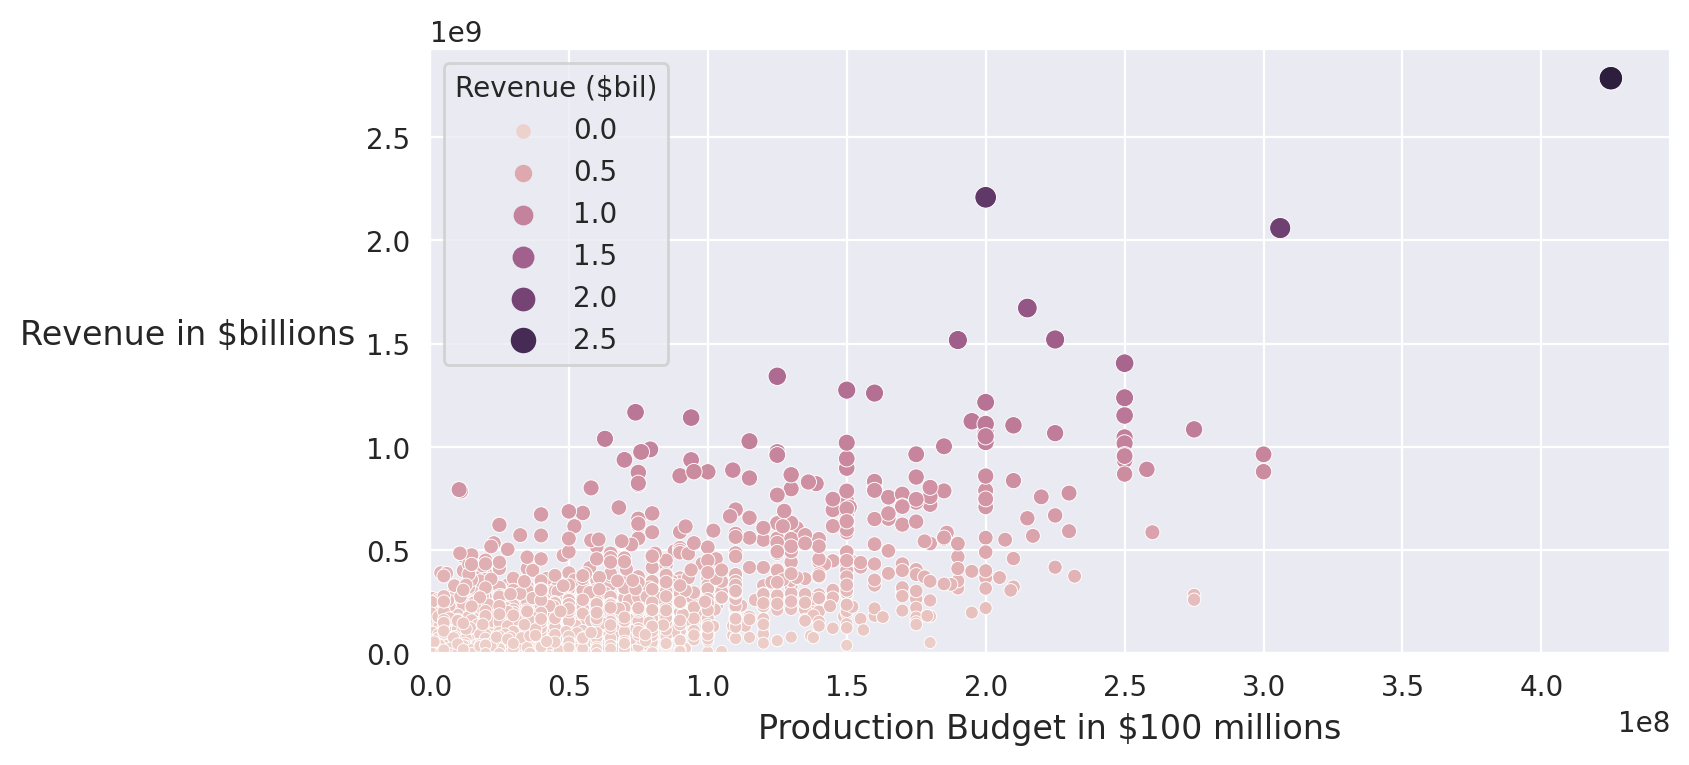

In [21]:
fig = plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=df_clean,
                         x='USD_Production_Budget',
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

    ax.set_ylabel('Revenue in $billions', rotation='horizontal',
                  ha='right', fontsize=12)
    ax.set_xlabel('Production Budget in $100 millions', fontsize=12)
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    ax.legend(title='Revenue ($bil)')

plt.show()


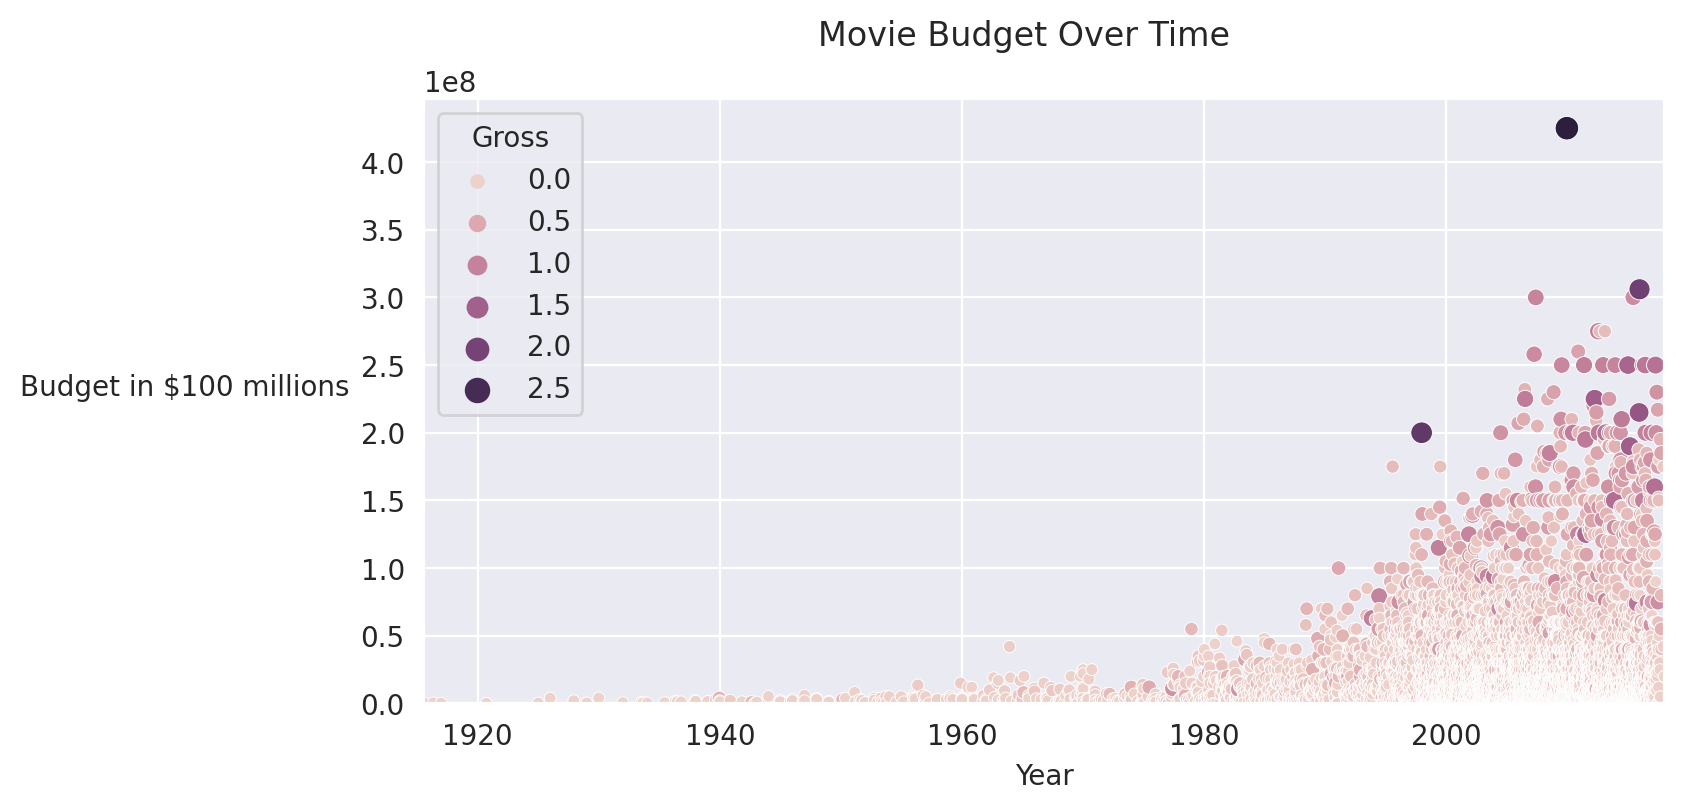

In [22]:
fig = plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=df_clean,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget in $100 millions', rotation=0, ha='right')
    ax.set_ylim(bottom=0)
    ax.set_xlim(df_clean['Release_Date'].min(), df_clean['Release_Date'].max())
    ax.legend(title='Gross')

    fig.suptitle('Movie Budget Over Time')

plt.show()


So, what is this chart telling us?

First off, the movie industry didn't exploded until after 1980s. There were very little movies produced before this time.

From 1970s onwards, the industry started to produce a lot more films and the budget invested in movies surged greatly. The dots are so dense that they overlap.

We've clearly seen how massive the industry has grown since 1980s, why don't we group our data by decade to see the overall growth.

## Convert Year to Decade <a id='year-to-decade'></a>

In [23]:
dt_index = pd.DatetimeIndex(data=df_clean['Release_Date'])
years = dt_index.year

# For example, how to convert the year 1999 to 1990s decade:
# 1999 // 10 = 199
# 199 * 10 = 1990

decades = years // 10 * 10
df_clean['Decade'] = decades


Create two new DataFrame called `df_old_films` and `df_new_films`:
* `df_old_films` includes movies released before year 1970 (up to and including 1969)
* `df_new_films` includes movies released from 1970 onwards.

In [24]:
df_old_films = df_clean[df_clean['Decade'] <= 1960]
df_new_films = df_clean[df_clean['Decade'] > 1960]

How many movies were released prior to 1970s?

In [25]:
len(df_old_films)

153

What were the most expensive movies made in this era?

In [26]:
df_old_films.sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
110,2552,1964-01-01,The Fall of the Roman Empire,19000000,4750000,4750000,1960
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000,1960
114,2670,1964-10-22,My Fair Lady,17000000,72070955,72000000,1960
102,2698,1963-01-01,55 Days at Peking,17000000,10000000,10000000,1960
125,2831,1966-10-10,Hawaii,15000000,34562222,34562222,1960


How about the most expensive movies of this era?

In [27]:
df_new_films.sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010
4223,7,2012-09-03,John Carter,275000000,282778100,73058679,2010
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099,2010
3777,8,2010-11-24,Tangled,260000000,586581936,200821936,2010
2885,9,2007-04-05,Spider-Man 3,258000000,890875303,336530303,2000
5161,12,2016-03-25,Batman v Superman: Dawn of Justice,250000000,868160194,330360194,2010


We can see that the money invested in movies are more than 10x times greater in the course of 4 decades.

## Plotting Linear Regression with Seaborn <a id='linear-regression'></a>
Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the [.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) function.

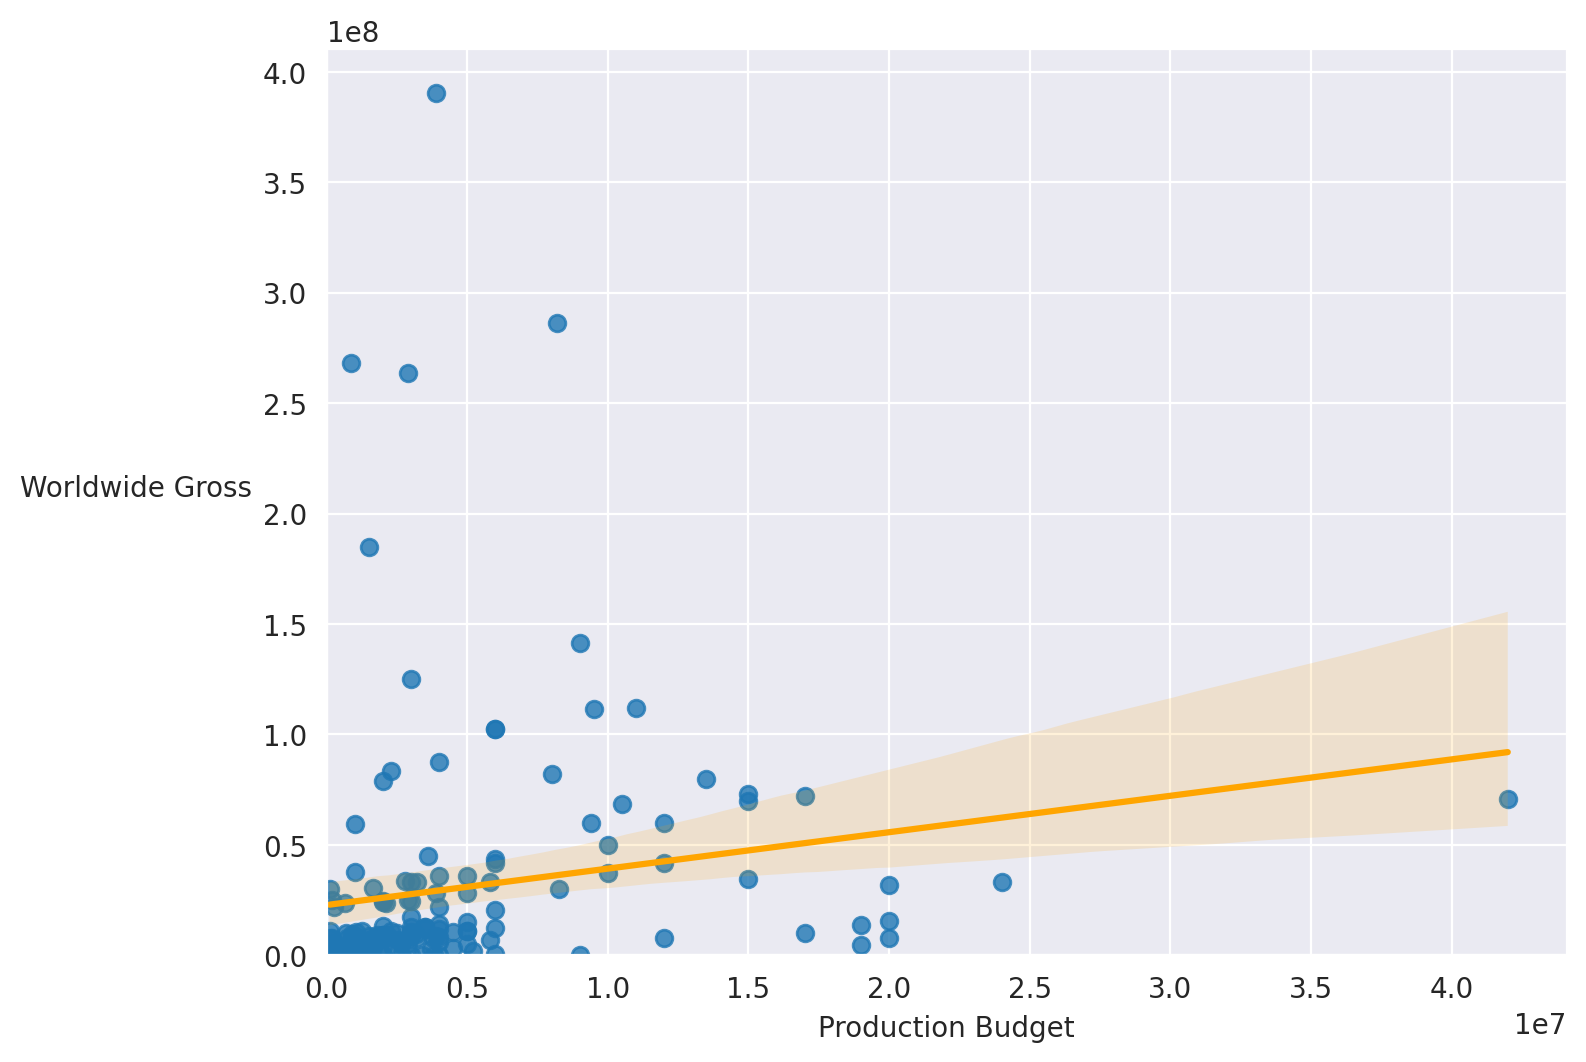

In [28]:
fig = plt.figure(figsize=(8, 6), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=df_old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', line_kws={'color': 'orange'})
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Production Budget')
    ax.set_ylabel('Worldwide Gross', rotation=0, ha='right')

plt.show()


We can see that Cleopatra (on the far right) had highest budget but didn't make much money compared to many movies with lower budget.

The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

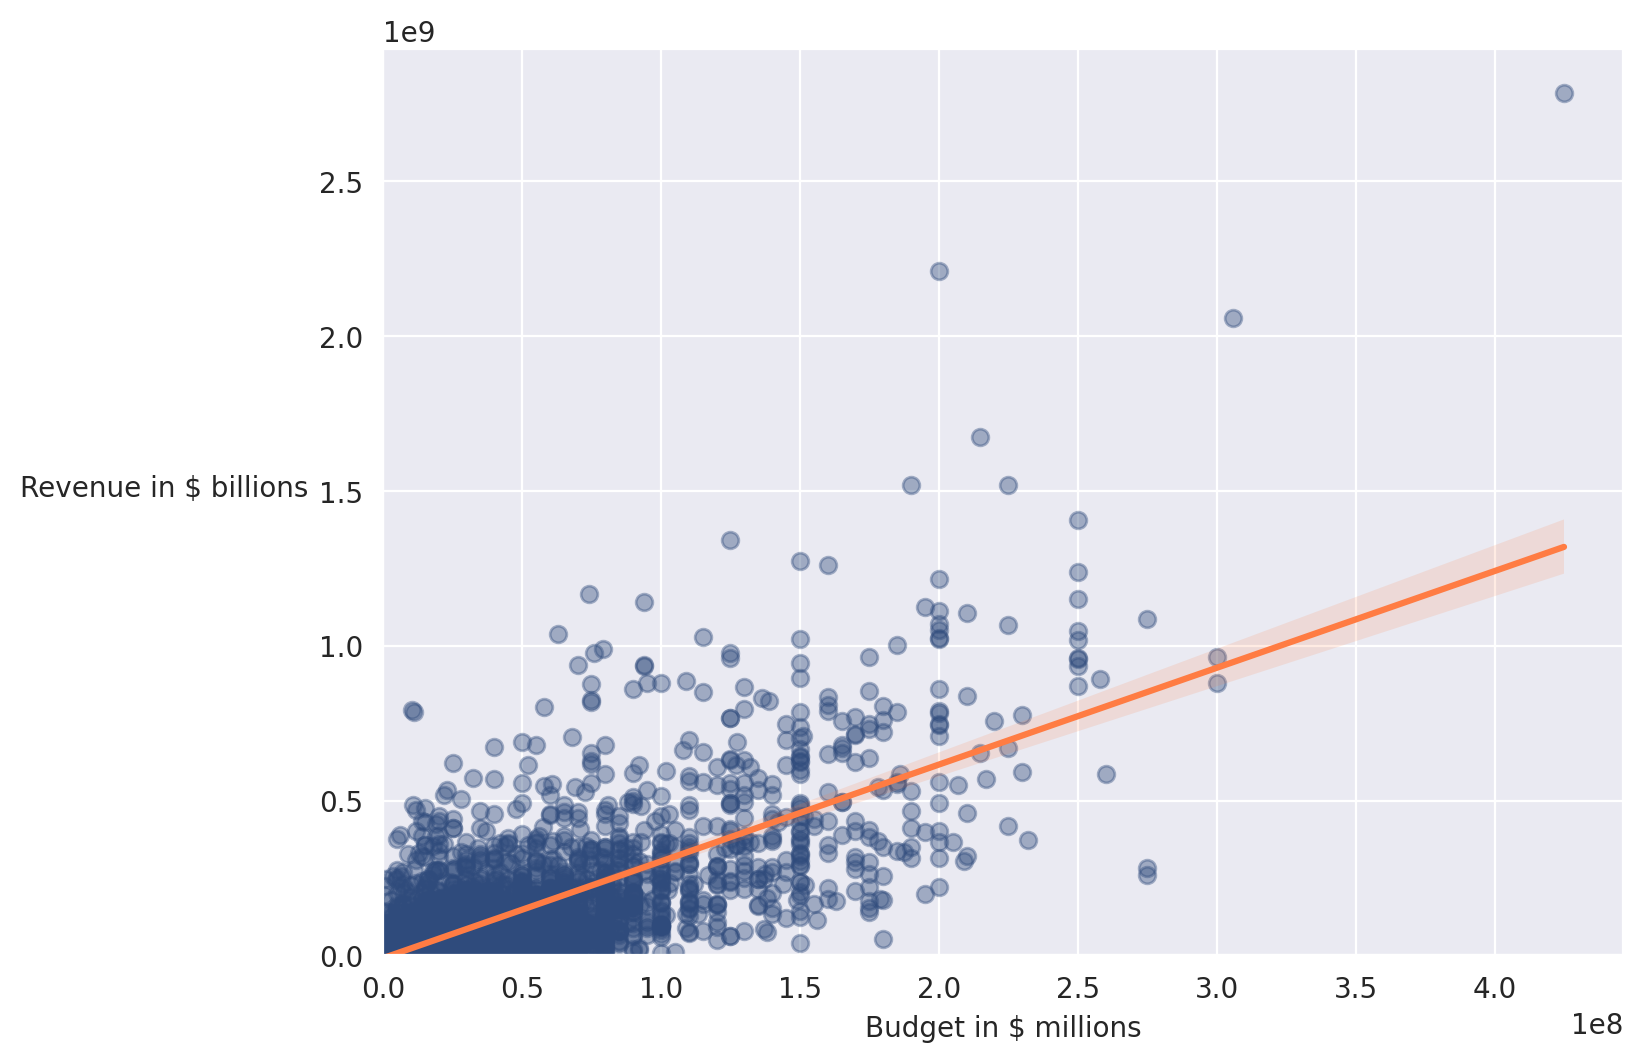

In [29]:
fig = plt.figure(figsize=(8, 6), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=df_new_films,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     scatter_kws={'color': '#2f4b7c', 'alpha': 0.4},
                     line_kws={'color': '#ff7c43'})
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Budget in $ millions')
    ax.set_ylabel('Revenue in $ billions', rotation=0, ha='right')

plt.show()


This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line. Also, the confidence interval is much narrower. From the line, we can see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue. A better invested movie will attract more audience therefore generate more revenue.

## Use Scikit-learn to Create LinearRegression Model <a id='linear-regression-model'></a>
Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

> USD_Worldwide_Gross = y-intercept + slope.USD_Production_Budget

To find the best possible line, our regression will estimate the `y-intercept` and the `slope`. The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

In [30]:
df_budget_gross = df_clean[['USD_Production_Budget', 'USD_Worldwide_Gross']]
df_budget_gross


,USD_Production_Budget,USD_Worldwide_Gross
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5379,40000000,166893990
5380,185000000,561137727
5381,175000000,140012608
5382,42000000,57850343


In [31]:

regressor = LinearRegression()

X = df_budget_gross.iloc[:, :-1].values
y = df_budget_gross.iloc[:, -1].values

regressor.fit(X, y)

LinearRegression()

Let's plot our regression model:

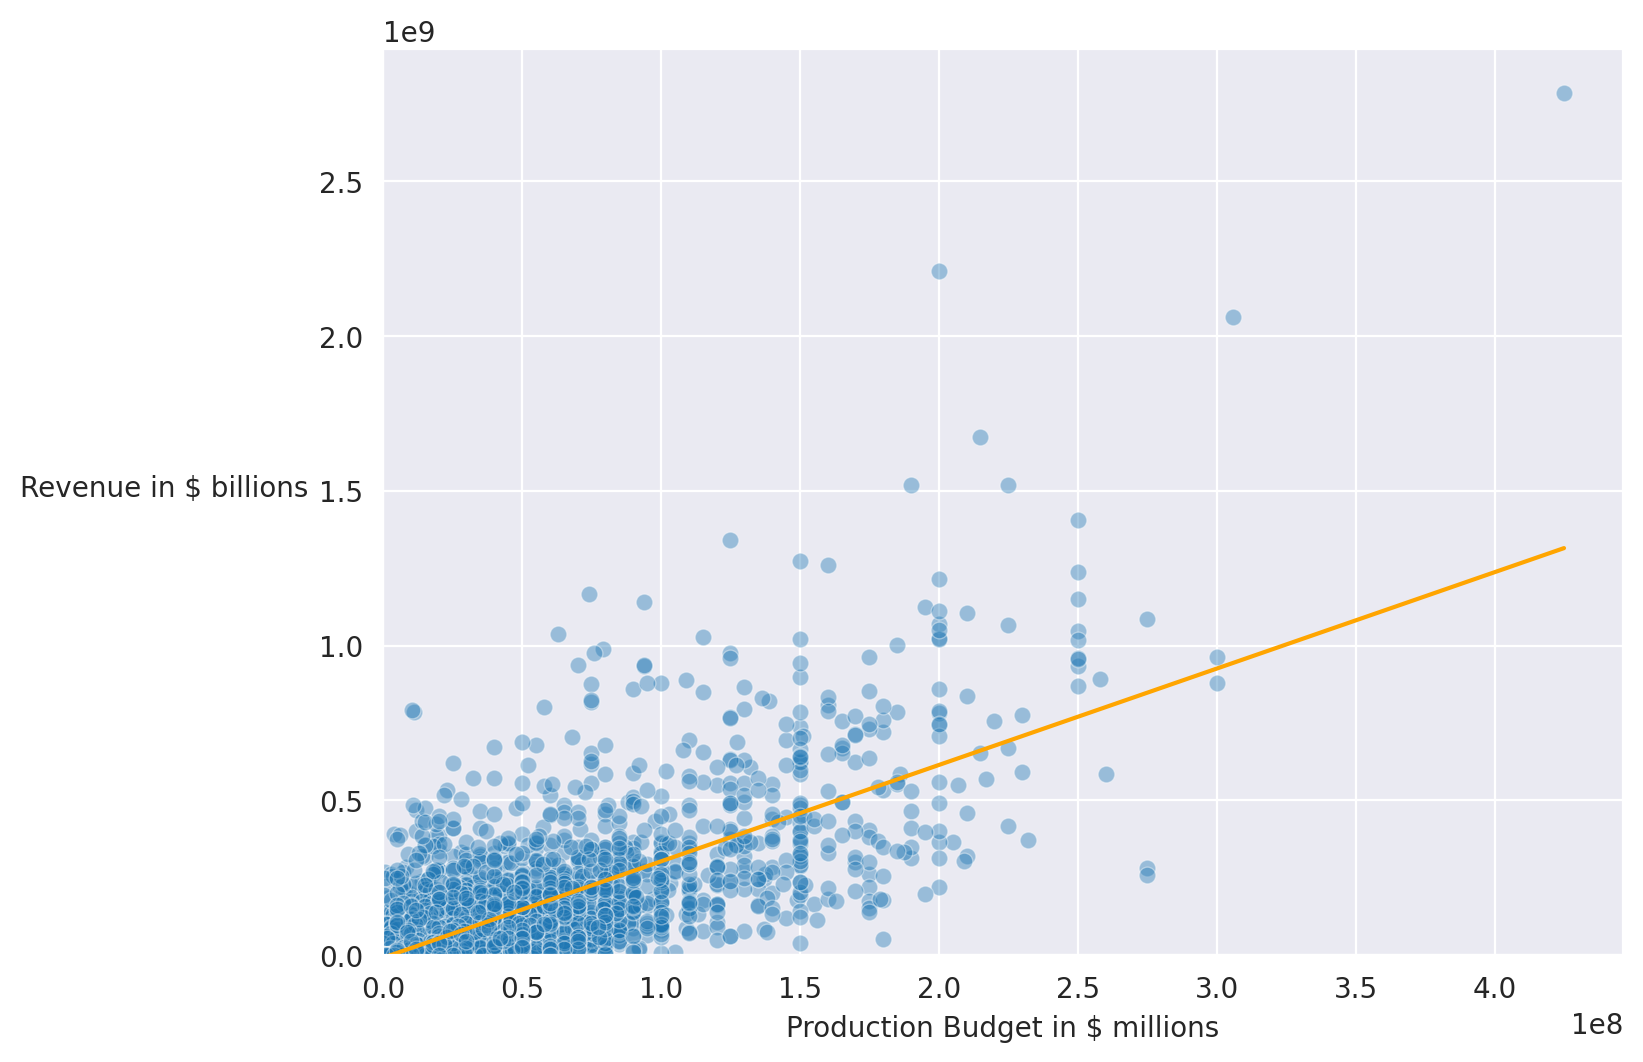

In [32]:
fig = plt.figure(figsize=(8, 6), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=df_clean,
                         x='USD_Production_Budget',
                         y='USD_Worldwide_Gross',
                         alpha=0.4)
    ax = sns.lineplot(x=df_clean['USD_Production_Budget'],
                      y=regressor.predict(X),
                      color='orange')

    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Production Budget in $ millions')
    ax.set_ylabel('Revenue in $ billions', rotation=0, ha='right')

plt.show()


As interpreted from the regression line, we can see that there is somewhat a relationship between the budget and the revenue. Generally speaking, the more budget drawn into movies the more revenue said movies make.